In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
#from lightgbm import LGBMRegressor
import re

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

pd.set_option('display.max_columns', None)
import datetime, warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("merged_flights.csv")

In [6]:
data.columns

Index(['Unnamed: 0', 'SCHEDULED_DATE', 'DAY_OF_WEEK', 'AIRLINE', 'TAIL_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'TAXI_OUT', 'WHEELS_OFF', 'SCHEDULED_TIME',
       'DISTANCE', 'SCHEDULED_ARRIVAL', 'ARRIVAL_DELAY', 'DEPARTURE_DELAY',
       'SPEED', 'IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE', 'Count Flights', 'Enplanements', 'area'],
      dtype='object')

In [7]:
data.head()

,Unnamed: 0,SCHEDULED_DATE,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,...,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Count Flights,Enplanements,area
0,0,2015-01-01,4,AS,N407AS,ANC,SEA,00:05:00,23:54:00,21.0,...,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west
1,1,2015-01-01,4,AS,N309AS,ANC,SEA,00:45:00,00:41:00,17.0,...,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west
2,2,2015-01-01,4,DL,N3743H,ANC,SEA,00:45:00,00:31:00,25.0,...,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west
3,3,2015-01-01,4,AS,N413AS,ANC,PDX,00:50:00,00:46:00,11.0,...,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west
4,4,2015-01-01,4,US,N804AW,ANC,PHX,01:52:00,01:43:00,21.0,...,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west


In [8]:
data.corr()

,Unnamed: 0,DAY_OF_WEEK,TAXI_OUT,SCHEDULED_TIME,DISTANCE,ARRIVAL_DELAY,DEPARTURE_DELAY,SPEED,LATITUDE,LONGITUDE,Count Flights
Unnamed: 0,1.000000,-0.005465,-0.094414,-0.190601,-0.226445,-0.002824,-0.008999,-0.242938,-0.139143,0.322474,-0.489014
DAY_OF_WEEK,-0.005465,1.000000,-0.019184,0.015228,0.016583,-0.019053,-0.014084,0.016425,-0.011068,-0.004572,0.000183
TAXI_OUT,-0.094414,-0.019184,1.000000,0.111012,0.069282,0.238806,0.061504,-0.039402,0.104253,0.153822,0.152707
SCHEDULED_TIME,-0.190601,0.015228,0.111012,1.000000,0.983078,-0.027254,0.021708,0.761787,0.001827,0.017750,0.040188
DISTANCE,-0.226445,0.016583,0.069282,0.983078,1.000000,-0.023849,0.017836,0.824982,-0.029677,-0.089779,0.044925
ARRIVAL_DELAY,-0.002824,-0.019053,0.238806,-0.027254,-0.023849,1.000000,0.748575,-0.009916,-0.006670,0.018746,0.015505
DEPARTURE_DELAY,-0.008999,-0.014084,0.061504,0.021708,0.017836,0.748575,1.000000,0.015778,-0.000839,0.036468,0.029566
SPEED,-0.242938,0.016425,-0.039402,0.761787,0.824982,-0.009916,0.015778,1.000000,-0.057333,-0.164789,0.064767
LATITUDE,-0.139143,-0.011068,0.104253,0.001827,-0.029677,-0.006670,-0.000839,-0.057333,1.000000,0.042575,-0.028924
LONGITUDE,0.322474,-0.004572,0.153822,0.017750,-0.089779,0.018746,0.036468,-0.164789,0.042575,1.000000,0.051986


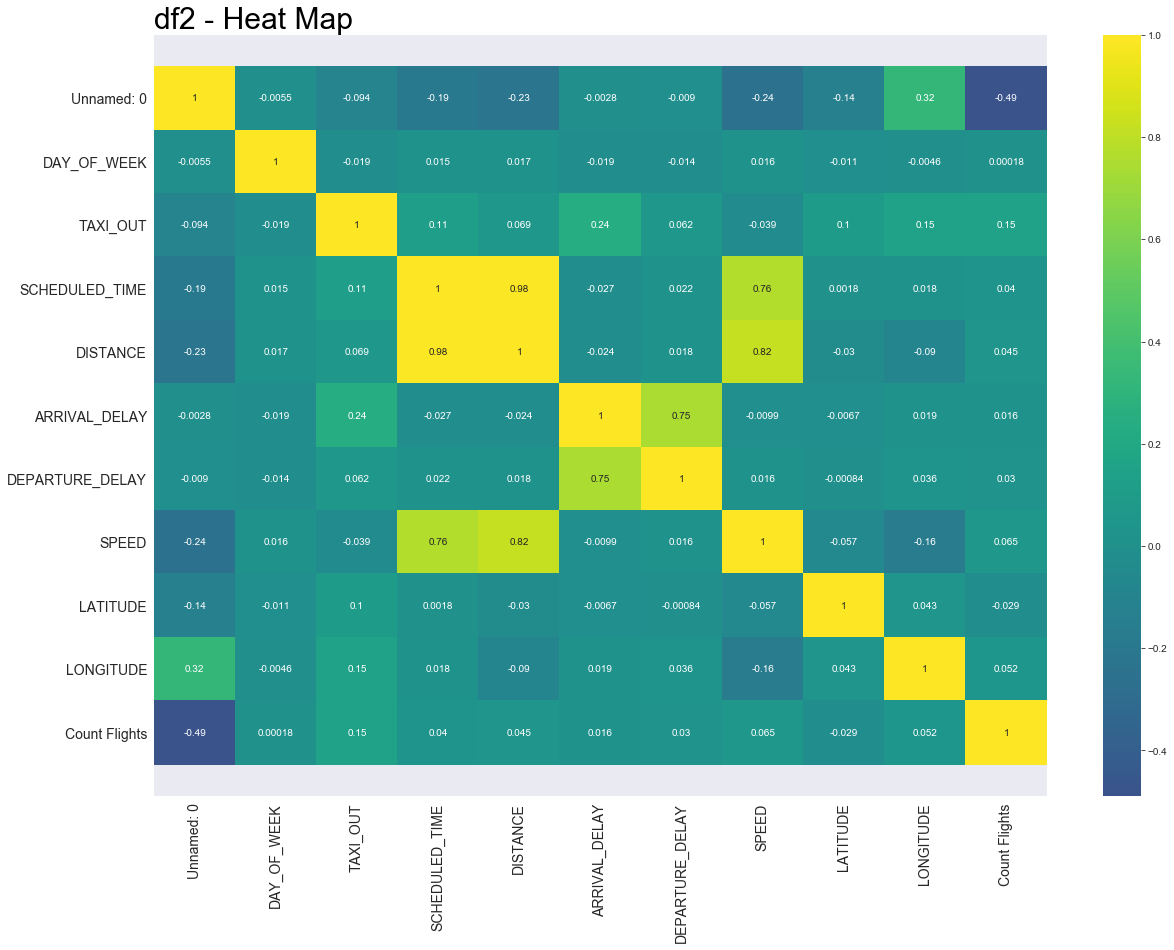

In [11]:
plt.figure(figsize=(20,14))
ax = sns.heatmap(data.corr(), cmap='viridis', center=0, annot=True)
bottom, top = ax.get_ylim()
plt.text(0,-0.6, "df2 - Heat Map", fontsize = 30, color='Black', fontstyle='normal')
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.yticks(rotation=0, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.show()

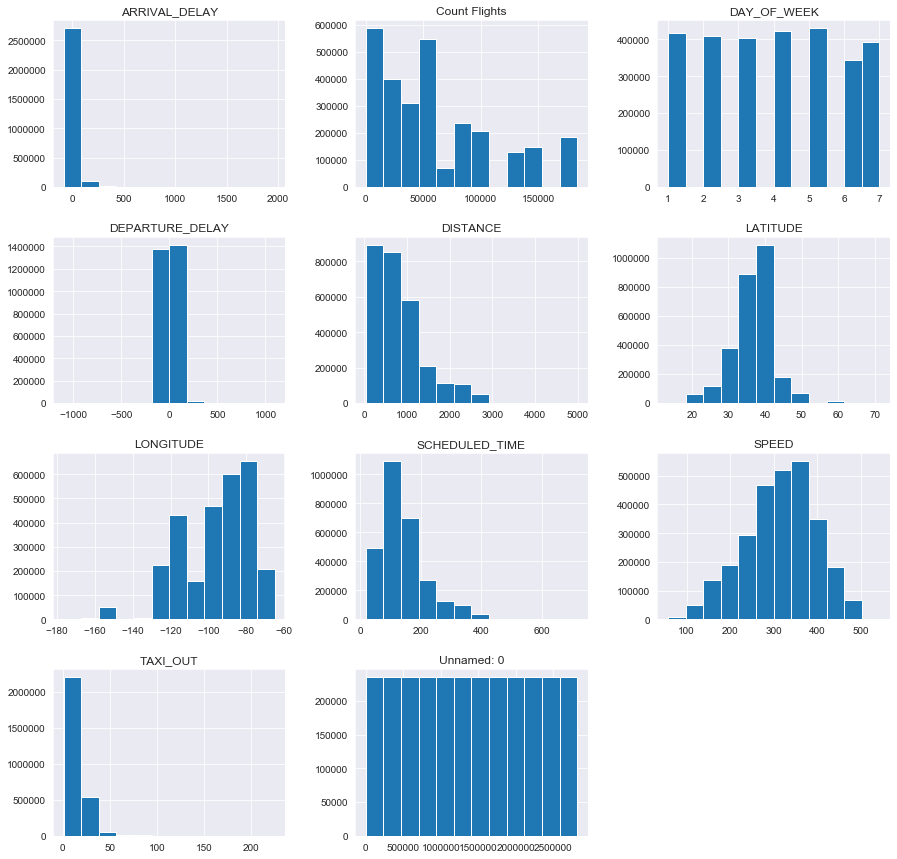

In [12]:
data.hist(figsize  = [15, 15],bins=12) 
plt.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
import datetime, warnings, scipy
warnings.filterwarnings("ignore")

In [16]:
data['AIRLINE'].replace({
    'UA':'United Airlines',
    'AS':'Alaska Airlines',
    '9E':'Endeavor Air',
    'B6':'JetBlue Airways',
    'EV':'ExpressJet',
    'F9':'Frontier Airlines',
    'G4':'Allegiant Air',
    'HA':'Hawaiian Airlines',
    'MQ':'Envoy Air',
    'NK':'Spirit Airlines',
    'OH':'PSA Airlines',
    'OO':'SkyWest Airlines',
    'VX':'Virgin America',
    'WN':'Southwest Airlines',
    'YV':'Mesa Airline',
    'YX':'Republic Airways',
    'AA':'American Airlines',
    'DL':'Delta Airlines'
}, inplace=True)

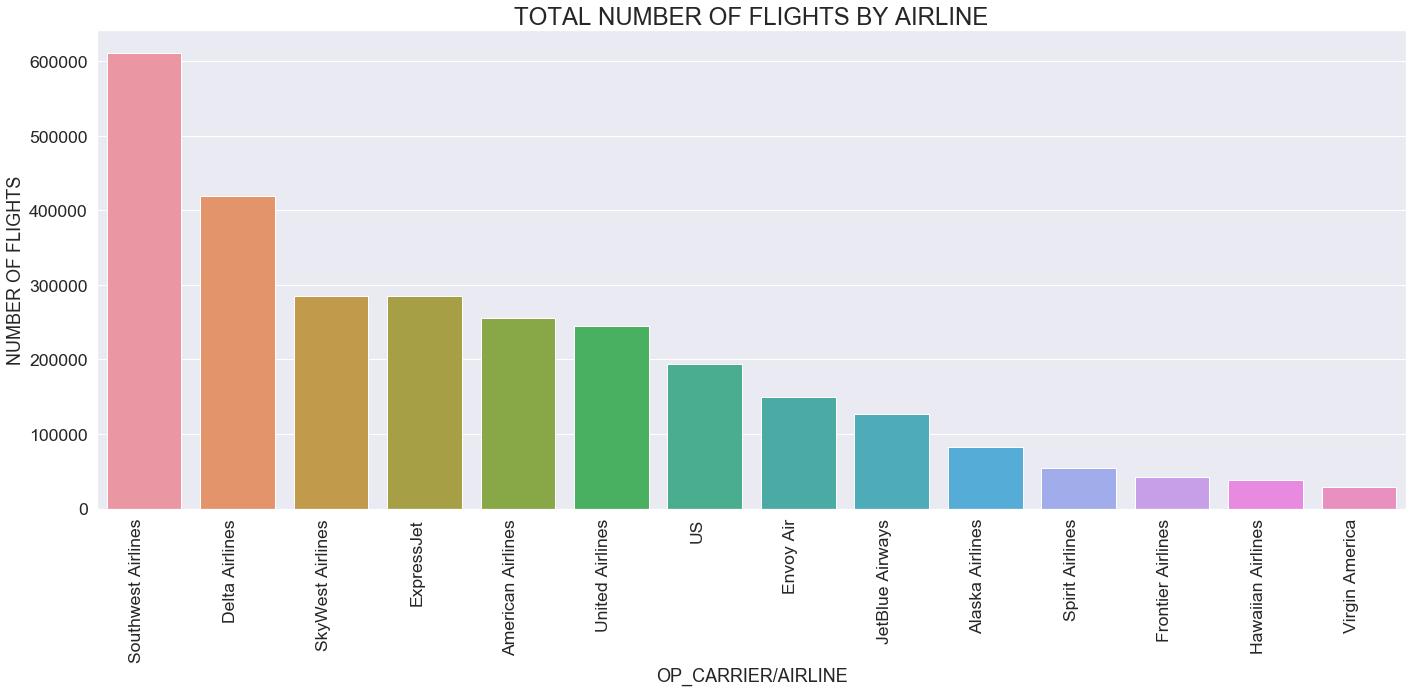

In [18]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=data['AIRLINE'], data=data, order=data['AIRLINE'].value_counts().iloc[0:18].index, orient="v")
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('TOTAL NUMBER OF FLIGHTS BY AIRLINE', fontsize=24)
plt.xlabel('OP_CARRIER/AIRLINE', fontsize=18)
plt.ylabel('NUMBER OF FLIGHTS', fontsize=18)
plt.tight_layout()
plt.show()

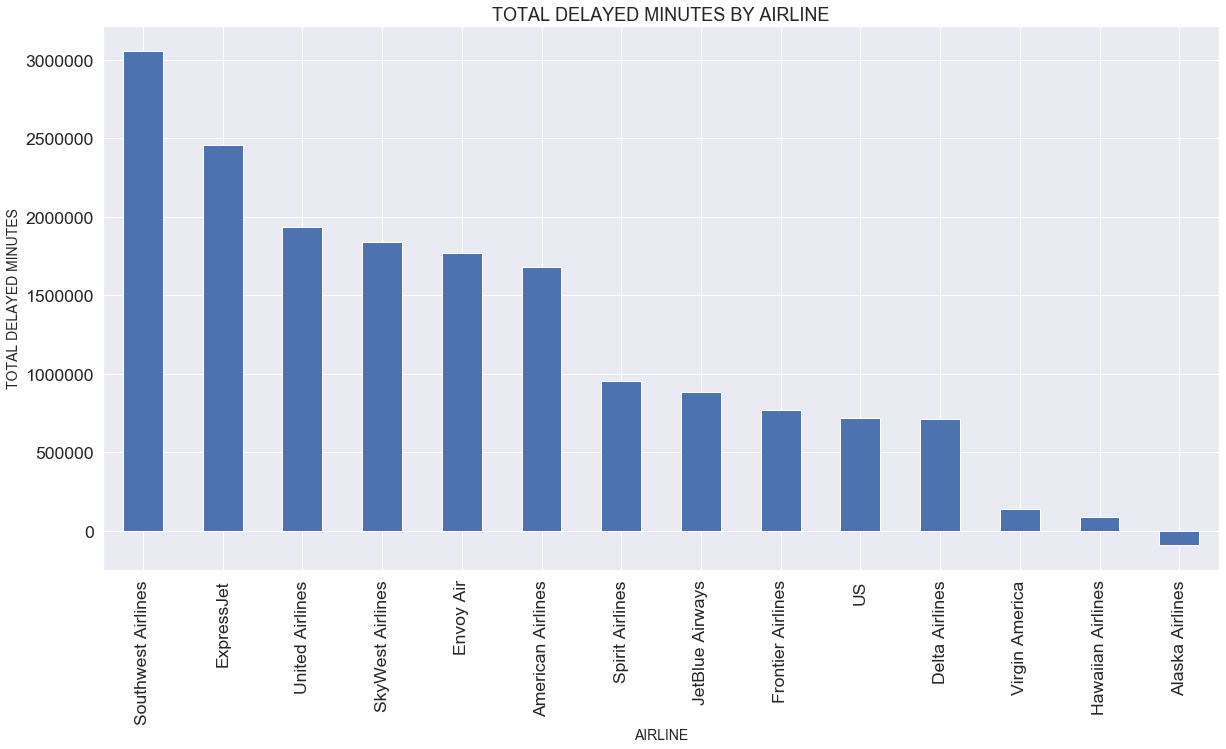

In [20]:
plt.figure(figsize=(20, 10))
data.groupby('AIRLINE').ARRIVAL_DELAY.sum().sort_values(ascending=False).plot.bar()
plt.title('TOTAL DELAYED MINUTES BY AIRLINE', fontsize=18)
plt.xlabel('AIRLINE', fontsize=14)
plt.ylabel('TOTAL DELAYED MINUTES', fontsize=14)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)
plt.show()

In [22]:
test_3 = data[['AIRLINE', 'ARRIVAL_DELAY']]
test_3 = test_3.groupby(['AIRLINE']).mean().reset_index()
test_3.rename({'ARRIVAL_DELAY': 'AVG_DELAY'}, axis=1, inplace=True)
test_3 = test_3.sort_values(['AVG_DELAY']).reset_index(drop=True)
test_3.head(18)

,AIRLINE,AVG_DELAY
0,Alaska Airlines,-1.104695
1,Delta Airlines,1.694466
2,Hawaiian Airlines,2.402099
3,US,3.706209
4,Virgin America,4.712407
5,Southwest Airlines,5.007338
6,SkyWest Airlines,6.455536
7,American Airlines,6.551453
8,JetBlue Airways,6.968689
9,United Airlines,7.915853


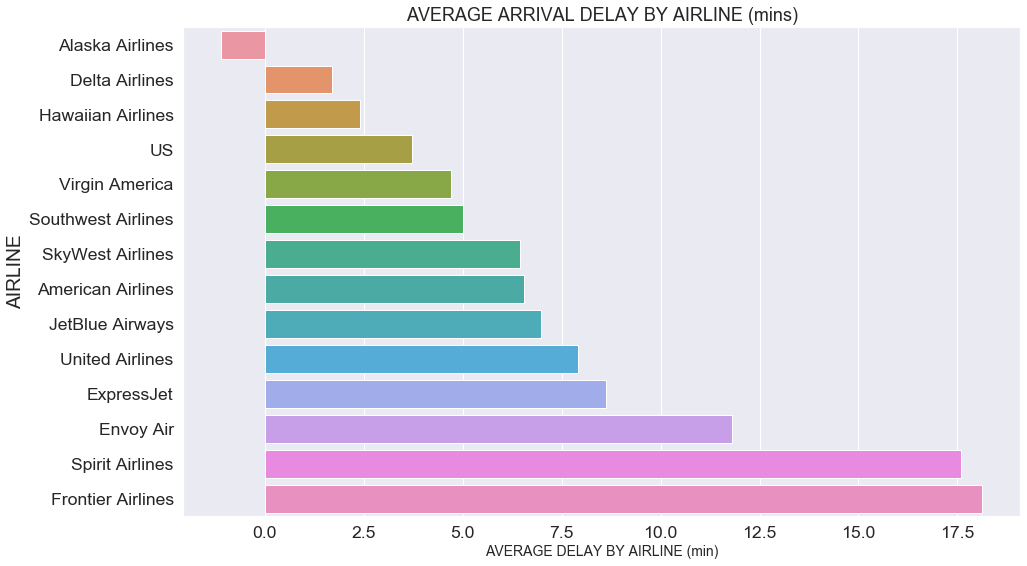

In [24]:
fig = plt.figure(1, figsize=(15,9))
sns.set(font_scale=1.6)
ax = sns.barplot(x='AVG_DELAY', y='AIRLINE', data=test_3)
ax.set_title('AVERAGE ARRIVAL DELAY BY AIRLINE (mins)', fontsize=18)
ax.set_xlabel('AVERAGE DELAY BY AIRLINE (min)', fontsize=14)
plt.show()

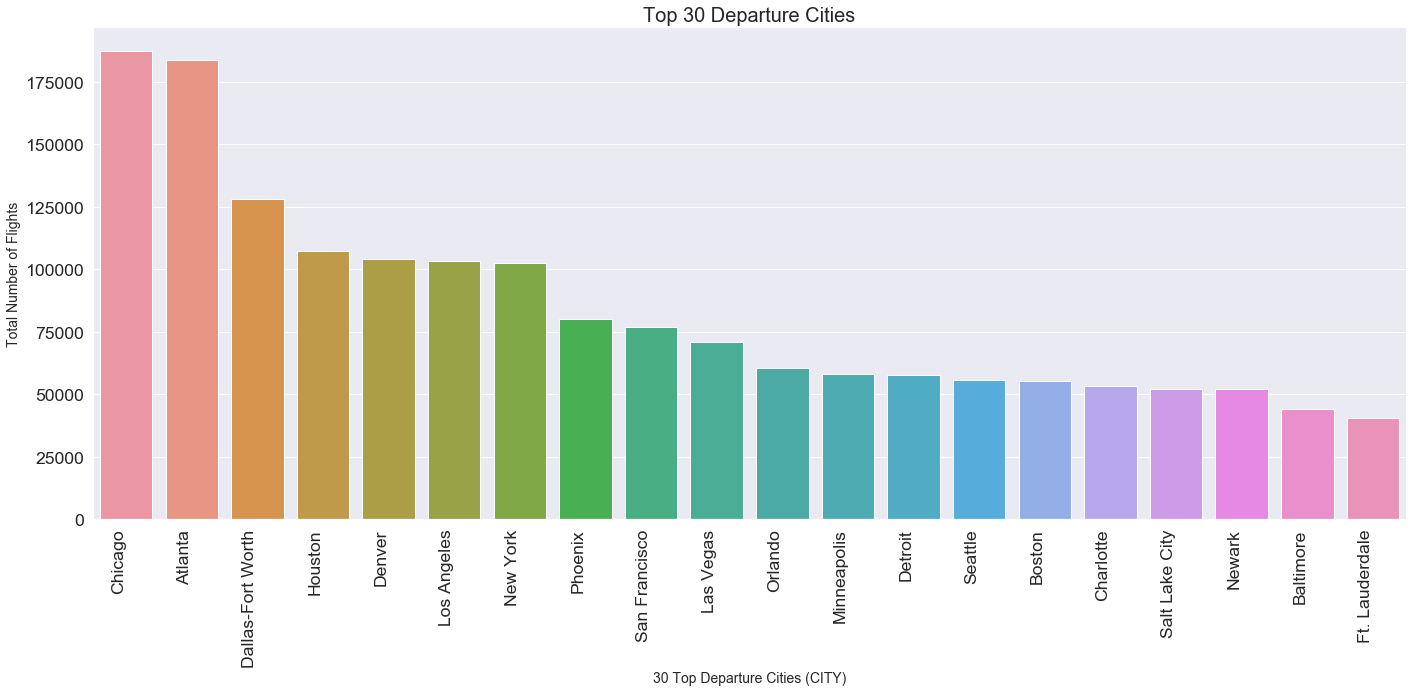

In [25]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.6)
axis = sns.countplot(x=data['CITY'], data=data, order=data['CITY'].value_counts().iloc[0:20].index)
axis.set_xticklabels(axis.get_xticklabels(), rotation=90, ha='right')
plt.title('Top 30 Departure Cities', fontsize=20)
plt.xlabel('30 Top Departure Cities (CITY)', fontsize=14)
plt.ylabel('Total Number of Flights', fontsize=14)
plt.tight_layout()
plt.show()

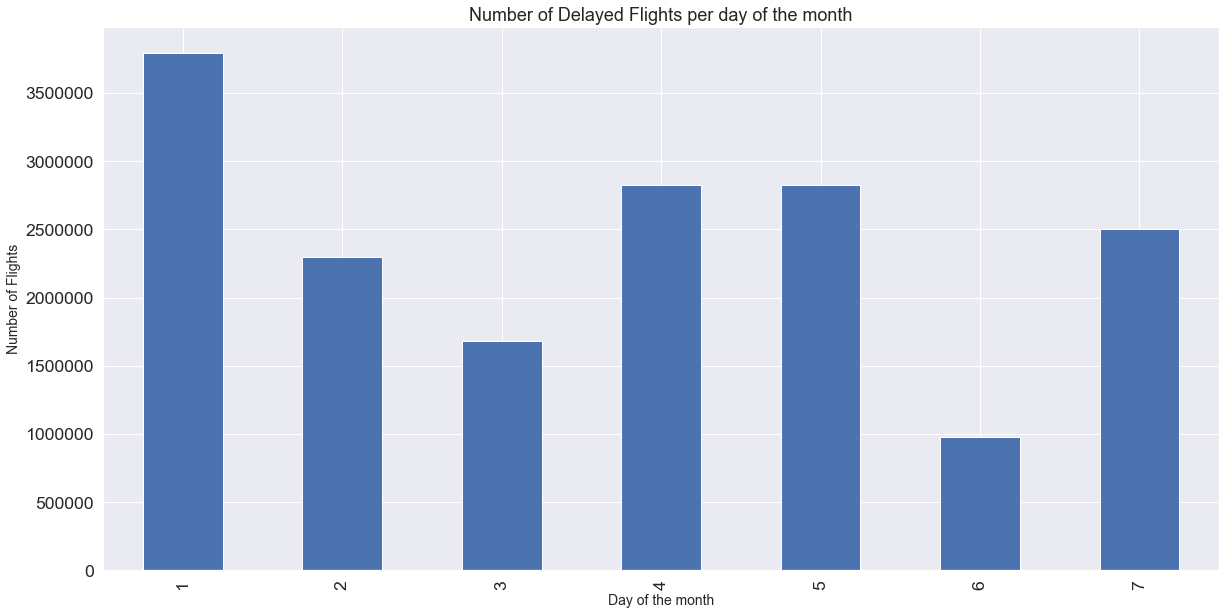

In [27]:
plt.figure(figsize=(20, 10))
data.groupby('DAY_OF_WEEK').ARRIVAL_DELAY.sum().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

In [47]:
#data[data["ARRIVAL_DELAY"] == 0.0]
#data['FLIGHT_STATUS'] = np.where(data['ARRIVAL_DELAY'] == 0.0, 0,1)
data['FLIGHT_STATUS'] = np.where(data['ARRIVAL_DELAY'] == 0.0, 0, np.where(data['ARRIVAL_DELAY'] >  0.0, 1, -1)) 

In [48]:
data[data["FLIGHT_STATUS"] == 1]

,Unnamed: 0,SCHEDULED_DATE,DAY_OF_WEEK,AIRLINE,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,DISTANCE,SCHEDULED_ARRIVAL,ARRIVAL_DELAY,DEPARTURE_DELAY,SPEED,IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE,Count Flights,Enplanements,area,FLIGHT_STATUS
19,19,2015-01-01,4,Alaska Airlines,N799AS,ANC,JNU,11:30:00,11:26:00,17.0,11:43:00,100.0,571,13:10:00,2.0,-4.0,342.600,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,1
27,27,2015-01-01,4,United Airlines,N73251,ANC,SFO,16:05:00,16:45:00,12.0,16:57:00,270.0,2018,21:35:00,20.0,40.0,448.444,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,1
31,31,2015-01-01,4,United Airlines,N36247,ANC,ORD,20:23:00,21:02:00,23.0,21:25:00,357.0,2846,05:20:00,21.0,39.0,478.319,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,1
33,33,2015-01-01,4,Alaska Airlines,N584AS,ANC,ORD,23:05:00,22:59:00,18.0,23:17:00,375.0,2846,08:20:00,8.0,-6.0,455.360,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,1
53,53,2015-01-02,5,Alaska Airlines,N570AS,ANC,SCC,07:10:00,07:08:00,17.0,07:25:00,106.0,627,08:56:00,1.0,-2.0,354.906,ANC,Ted Stevens Anchorage International Airport,Anchorage,AK,USA,61.17432,-149.99619,7888,"2,713,843",west,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818536,2818536,2015-06-26,5,Alaska Airlines,N767AS,GST,JNU,17:40:00,18:23:00,4.0,18:27:00,24.0,41,18:04:00,40.0,43.0,102.500,GST,Gustavus Airport,Gustavus,AK,USA,58.42438,-135.70738,24,"11,130",west,1
2818537,2818537,2015-06-27,6,Alaska Airlines,N795AS,GST,JNU,17:40:00,17:41:00,4.0,17:45:00,24.0,41,18:04:00,2.0,1.0,102.500,GST,Gustavus Airport,Gustavus,AK,USA,58.42438,-135.70738,24,"11,130",west,1
2818543,2818543,2015-06-20,6,JetBlue Airways,N351JB,HYA,JFK,13:09:00,18:24:00,24.0,18:48:00,72.0,196,14:21:00,330.0,315.0,163.333,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036,12,"31,027",south,1
2818545,2818545,2015-06-22,1,JetBlue Airways,N339JB,HYA,JFK,13:09:00,13:55:00,6.0,14:01:00,72.0,196,14:21:00,25.0,46.0,163.333,HYA,Barnstable Municipal Airport,Hyannis,MA,USA,41.66934,-70.28036,12,"31,027",south,1


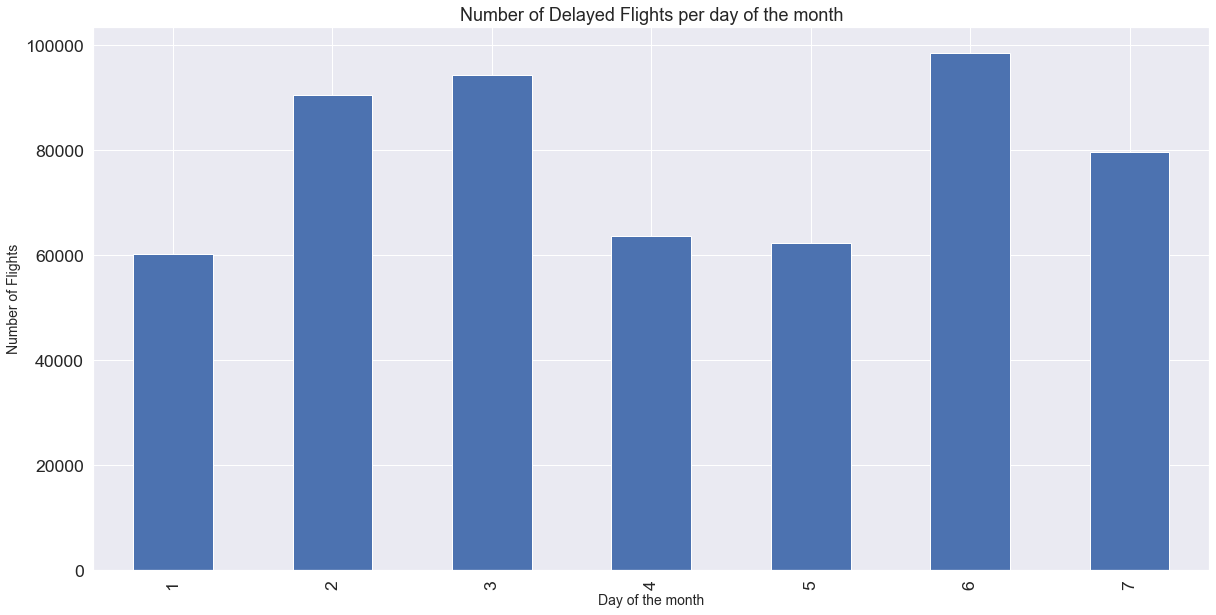

In [50]:
plt.figure(figsize=(20, 10))
data.groupby('DAY_OF_WEEK').FLIGHT_STATUS.sum().abs().plot.bar()
plt.title('Number of Delayed Flights per day of the month', fontsize=18)
plt.xlabel('Day of the month', fontsize=14)
plt.ylabel('Number of Flights', fontsize=14)
plt.show()

In this next visualization what I will try to do is analyze both, the departure and the arrival delay. I want to see which one of both has a bigger impact on the plane being late overall. 

I am assuming that if your departure is on time and the flight is late on arrival, then this means that something else increased your elapse time, which is supposed to be the planned time needed for the flight trip. 

This plot should also confirm the theory that some airlines when having a delay from their departure try to compensate by reducing their air time. At this point that is just a theory so we will see.

In order to do this, I will use a different type of plot, where I will overlay the ARR_DELAY over the DEP_DELAY and see how they behave: 

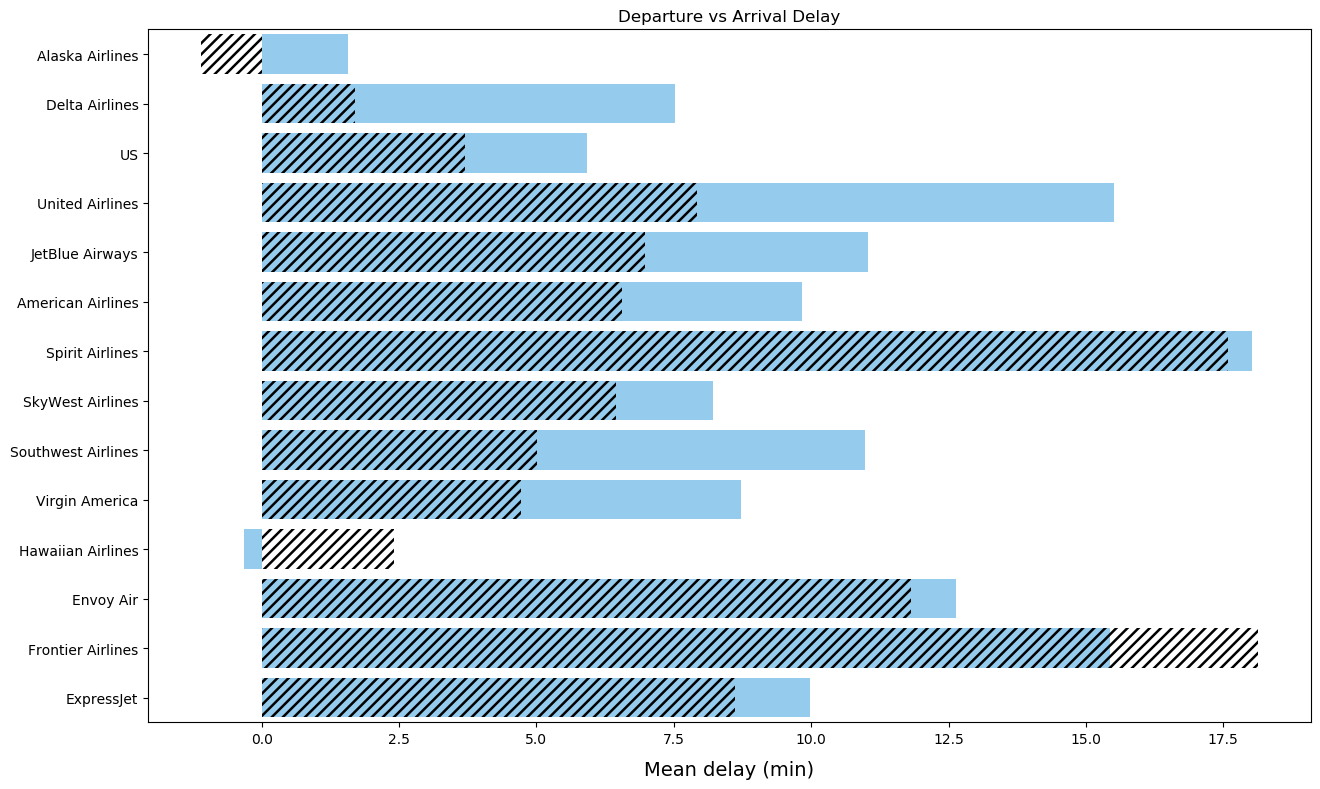

In [52]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="DEPARTURE_DELAY", y="AIRLINE", data=data, color="lightskyblue", ci=None)
ax = sns.barplot(x="ARRIVAL_DELAY", y="AIRLINE", data=data, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.xlabel('Mean delay (min)', fontsize=14, labelpad=10);

The departure delay (DEP_DELAY) is the light blue color, whereas the arrival delay (ARR_DELAY) is the dashed line.

The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS, and as mentioned above, this suggests that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.                                                   

Another interesting piece of information is related to Alaska Airlines. Once again, the arrivals are negative. This means that even when they leave late, they are a good airline compensating by reducing the time of the flights to arrive on time or in average, earlier as the plot suggest.

In [54]:
test_6 = data[['CITY', 'DEPARTURE_DELAY']]
test_6 = test_6.groupby(['CITY']).mean().reset_index()
test_6.head(10)

,CITY,DEPARTURE_DELAY
0,Aberdeen,12.112045
1,Abilene,7.921648
2,Adak,2.420000
3,Agana,24.264045
4,Aguadilla,12.966717
5,Akron,5.947104
6,Albany,7.157945
7,Albuquerque,8.475434
8,Alexandria,10.398187
9,Allentown,8.083904


In [57]:
test_7 = data.CITY.value_counts().rename_axis('CITY').reset_index(name='FLIGHTS').iloc[0:30]
test_7.head(30)

,CITY,FLIGHTS
0,Chicago,187486
1,Atlanta,183656
2,Dallas-Fort Worth,128294
3,Houston,107331
4,Denver,104038
5,Los Angeles,103511
6,New York,102550
7,Phoenix,80236
8,San Francisco,76788
9,Las Vegas,71010


In [66]:
test_6_7 = pd.merge(test_7, test_6, on='CITY')
test_6_7.head()

,CITY,FLIGHTS,DEPARTURE_DELAY
0,Chicago,187486,14.780592
1,Atlanta,183656,8.799457
2,Dallas-Fort Worth,128294,13.312064
3,Houston,107331,12.361489
4,Denver,104038,12.383485


In [59]:
test_6_7.describe()

,FLIGHTS,DEPARTURE_DELAY
count,30.000000,30.000000
mean,66243.666667,9.820406
std,42838.242074,3.003136
min,23157.000000,1.445481
25%,37802.000000,7.993031
50%,54326.000000,10.176561
75%,79374.000000,12.111048
max,187486.000000,14.780592


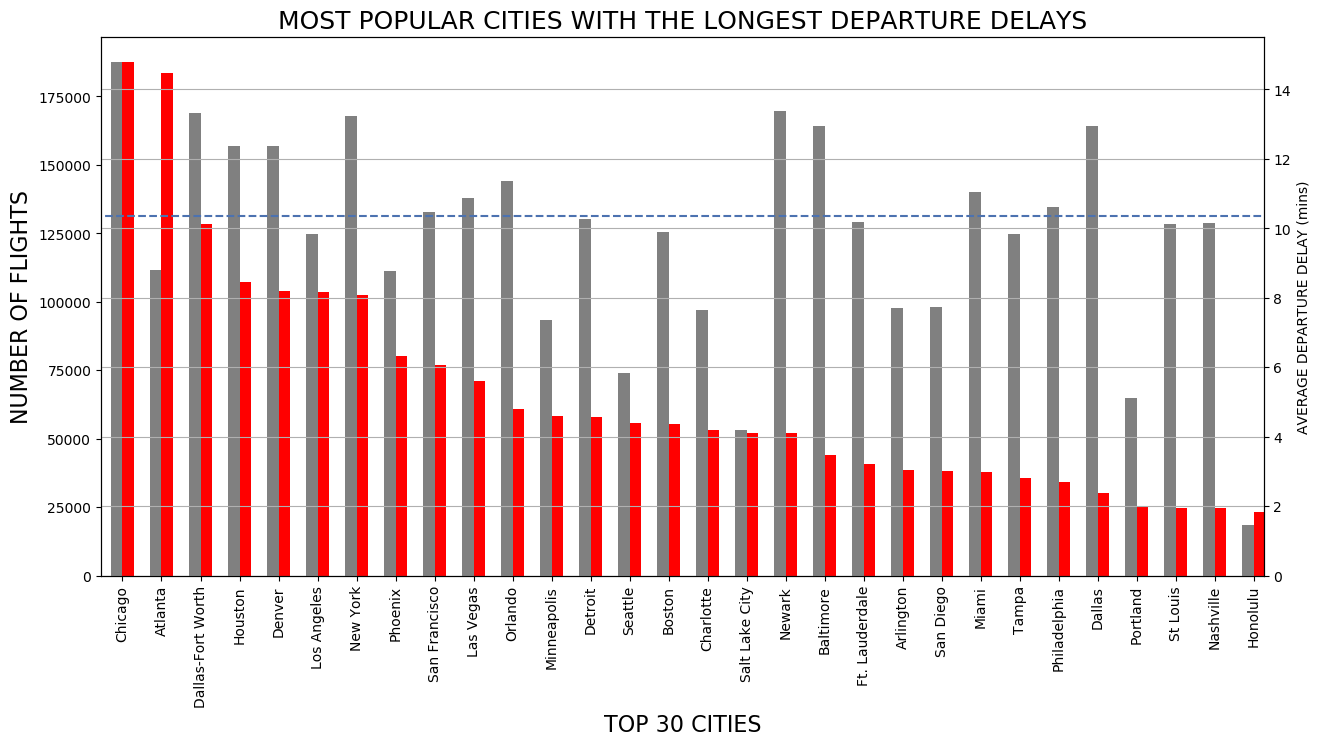

In [67]:
test_6_7 = test_6_7.set_index('CITY')

fig = plt.figure(figsize=(15,7)) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis
width = .3

test_6_7.FLIGHTS.plot(kind='bar',color='red',ax=ax, width=width, position=0)
test_6_7.DEPARTURE_DELAY.plot(kind='bar',color='grey', ax=ax2, width=width, position=1)

plt.hlines(y=10.345, xmin=-1, xmax=30, colors='b', linestyles='dashed', label='cutoff')

#ax.grid(None, axis=1)
ax2.grid(None)

ax.set_title('MOST POPULAR CITIES WITH THE LONGEST DEPARTURE DELAYS', fontsize=18)
ax.set_ylabel('NUMBER OF FLIGHTS', fontsize=16)
ax2.set_ylabel('AVERAGE DEPARTURE DELAY (mins)')
ax.set_xlabel('TOP 30 CITIES', fontsize=16)
plt.show()